# <font color = "#0024c7" face="Garamond" > Bike Sharing Case Study </font>


# Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


# Business Goal:

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# EDA and Data Preparation

## Importing Necessary Libraries

In [1]:
# Supressing the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Dataframe libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)

In [3]:
# Visulisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline 

## Data analysis

In [4]:
# Read dataset
bike = pd.read_csv('data/day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.shape

(730, 16)

In [6]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
## Checking for null values

bike.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### No Null values are present

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
# Column names are bit confusing,hence renaming them for better understanding

bike.rename(columns = {'yr':'year', 'mnth':'months', 'hum':'humidity', 'cnt':'count'}, inplace= 'True')
bike.head()

,instant,dteday,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Checking for duplicates

In [11]:
# Checking for duplicate entries and dropping if any

bike_dup = bike

bike_dup.drop_duplicates(subset = None, inplace = None)
bike_dup.shape



(730, 16)

* No duplicate values present

## Handling redundant columns

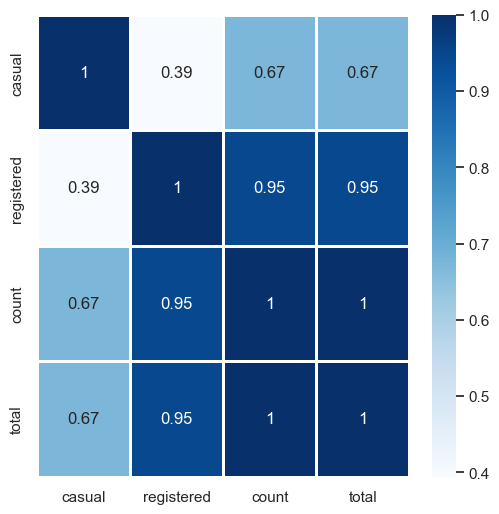

In [12]:
# Removing redundant columns
bike_cnt = bike[['casual', 'registered', 'count']]

bike_cnt['total'] = bike_cnt['casual'] + bike_cnt['registered']

plt.figure(figsize = (6,6))
ax = sns.heatmap(bike_cnt.corr(), annot = True, cmap='Blues', linewidth = 1)
plt.show()

In [13]:
## Dropping the redundant columns

bike.drop(['instant', 'dteday', 'casual', 'registered'], axis = 1, inplace = True)
bike.shape

(730, 12)

# Data Visualization

## Converting into categorical columns 
<br>
* Converting season, month, weathersit and weekday to categorical columns

In [14]:
# Season
bike.season.replace((1,2,3,4), ('Spring', 'Summer', 'Fall', 'Winter'), inplace = True)
#bike.season.value_counts(normalize = True)
bike.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [15]:
# Months
bike.months.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
bike.months.value_counts()

Jan    62
Mar    62
May    62
Jul    62
Aug    62
Oct    62
Dec    62
Apr    60
Jun    60
Sep    60
Nov    60
Feb    56
Name: months, dtype: int64

In [16]:
# Weathersit
bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts()

Clear             463
Misty             246
Light_rainsnow     21
Name: weathersit, dtype: int64

In [17]:
# Weekday
bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
bike.weekday.value_counts()

Saturday     105
Sunday       105
Monday       105
Tuesday      104
Thursday     104
Friday       104
Wednesday    103
Name: weekday, dtype: int64

## Analyzing Categorical Variables

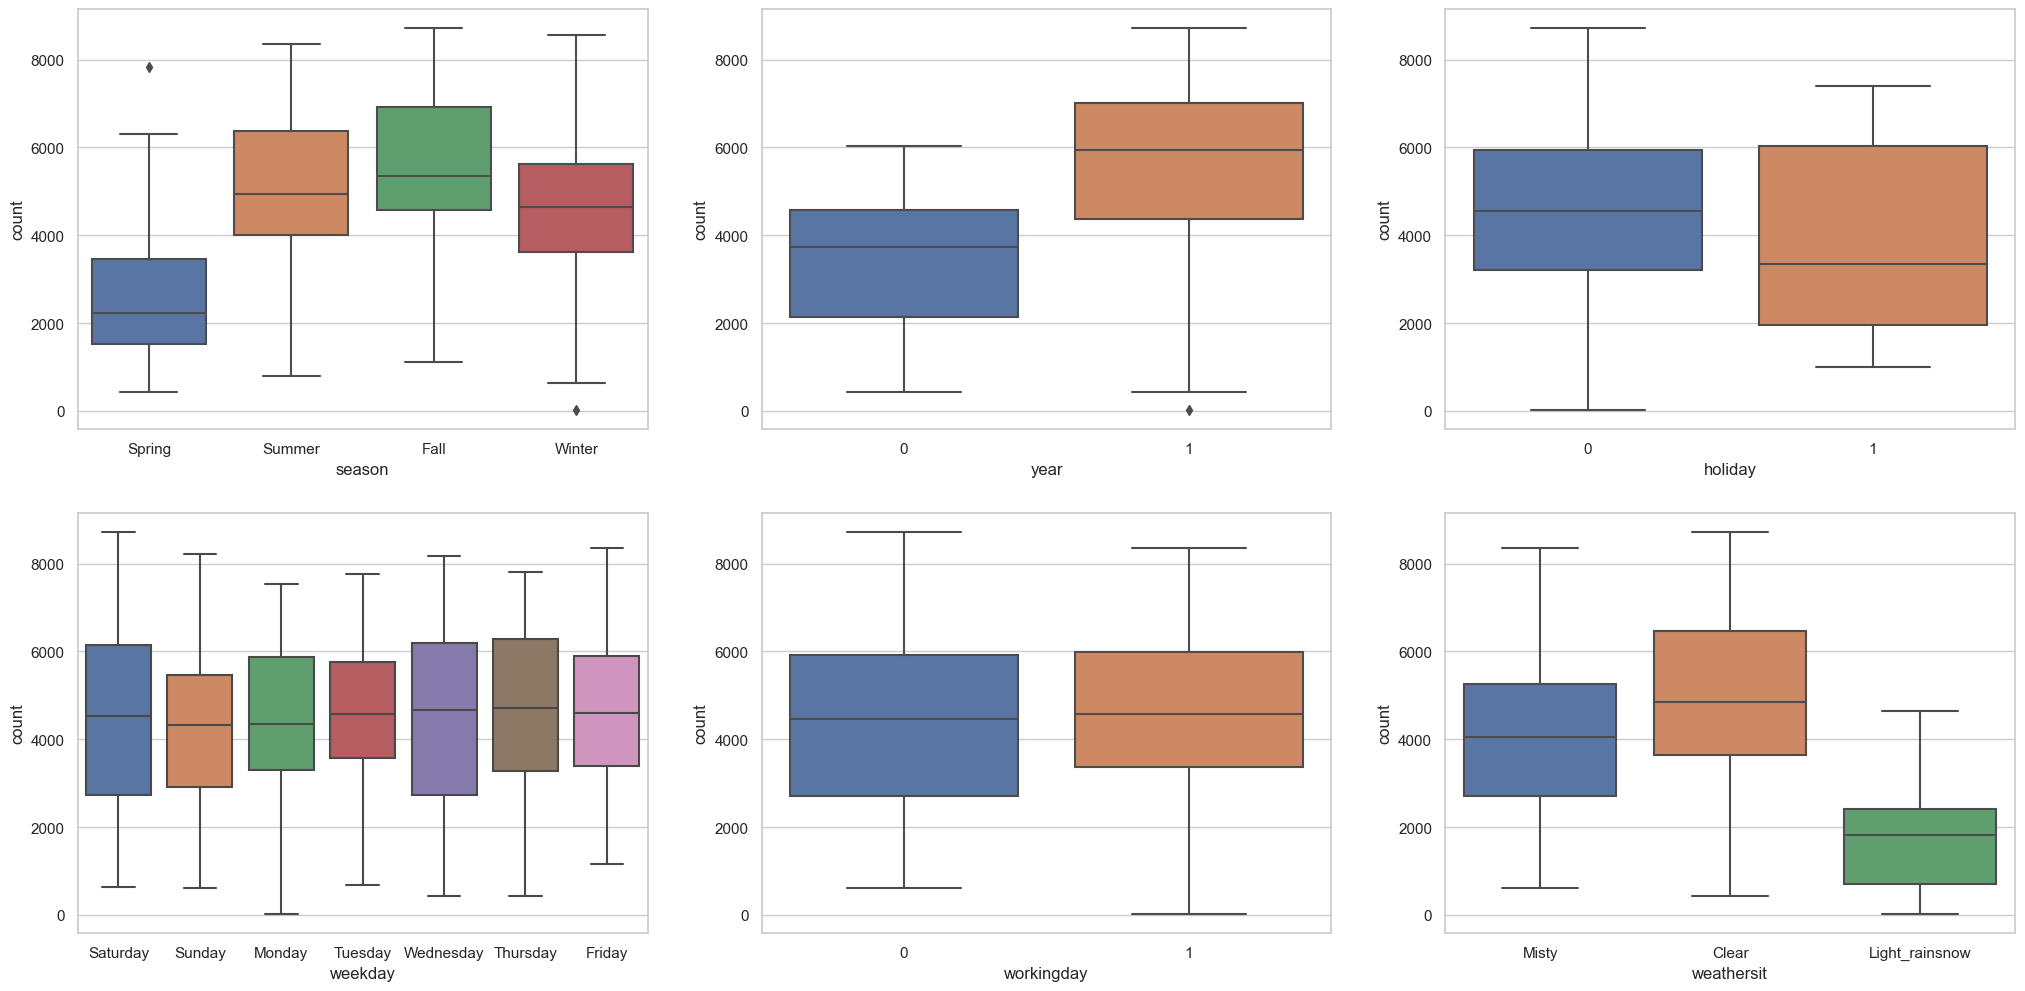

In [18]:
def boxplot_cat_var(cat_var,target):
    plt.figure(figsize=(25, 12))
    for i in range(0,len(cat_var)):
        plt.subplot(2,3,i+1)
        sns.boxplot(x = cat_var[i], y = target, data = bike)
    plt.show()

cat_var =['season','year','holiday','weekday','workingday','weathersit']
boxplot_cat_var(cat_var,'count')

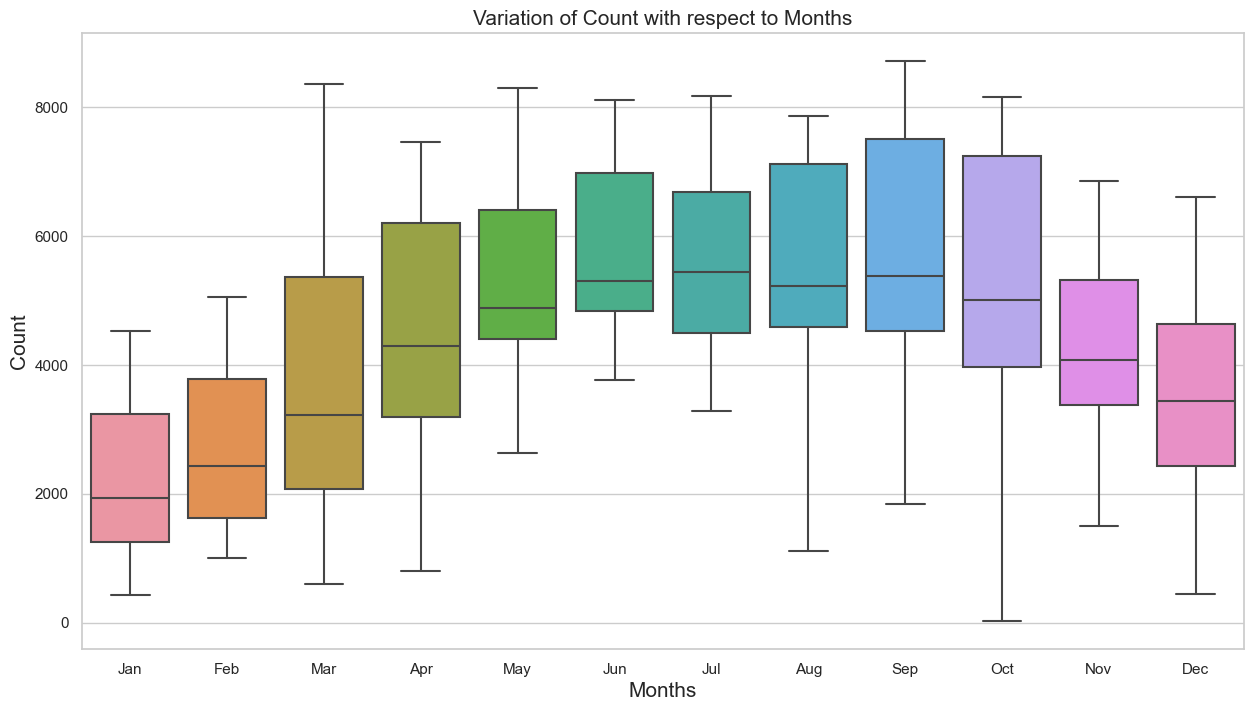

In [19]:
plt.figure(figsize=(15, 8))
sns.boxplot(x = 'months', y = 'count', data = bike).set_title('Variation of Count with respect to Months', fontsize = 15)
plt.xlabel("Months", fontsize = 15) 
plt.ylabel("Count", fontsize = 15) 
plt.show()

In [20]:
# Function to generate statistics for categorical variables

def cat_stats(col):
    cat_df = bike.groupby(col)['count'].agg(['sum', 'mean','count']).sort_values('sum',ascending = False)
    cat_df['sum_perc']=cat_df['sum']/bike['count'].sum()*100
    cat_df['count_perc']=cat_df['count']/bike['count'].count()*100
    return round(cat_df,2)

In [21]:
# Functions to generate plots for categorical variables

def cat_plots(col, x, y, data):
    plt.figure(figsize=(x, y))
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=data)
    plt.subplot(1, 2, 2)
    sns.countplot(x=col, data=data, hue='year', palette='Paired')
    plt.legend(labels=['2018', '2019'])
    return

* ### Analyzing Seasons

In [22]:
cat_stats('season')

,sum,mean,count,sum_perc,count_perc
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


In [23]:
bike

,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,1,Dec,0,Thursday,1,Misty,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,1,Dec,0,Friday,1,Misty,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,1,Dec,0,Saturday,0,Misty,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,23.500518,1796


### Observation

* 32% of the bike booking happened in Fall, followed by Summer & Winter with 27% & 25% of total booking respectively.

* ### Analyzing Months

In [24]:
cat_stats('months')

,sum,mean,count,sum_perc,count_perc
months,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


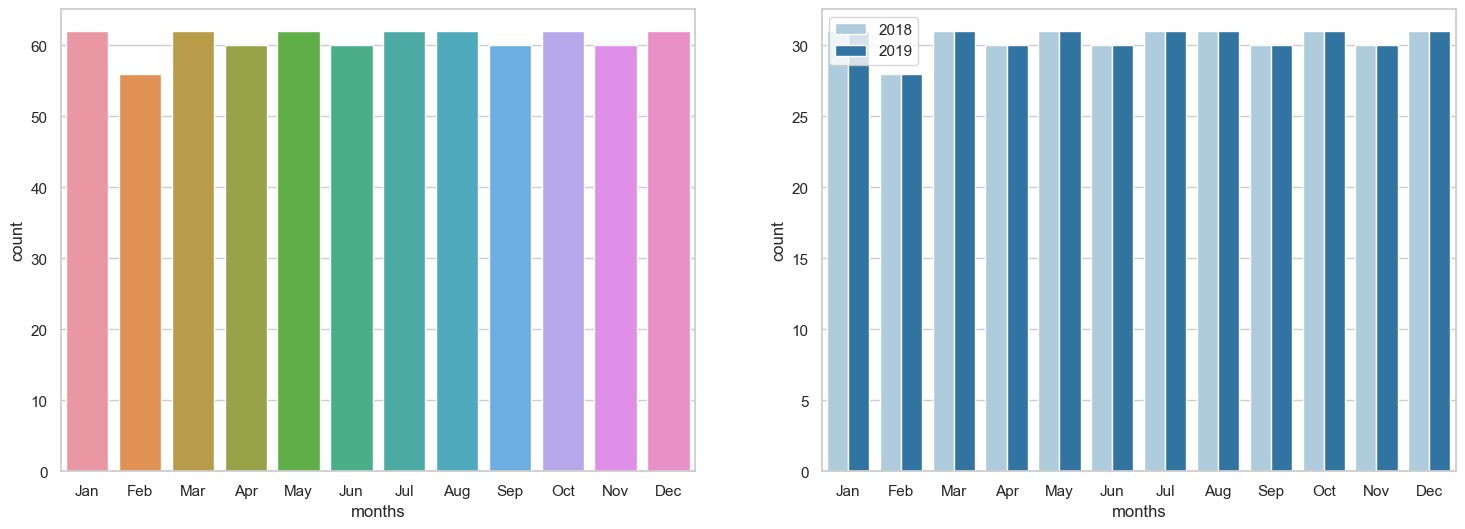

In [25]:
cat_plots('months', 18,6, bike)

### Observation

* More than 10% of the bike booking happend in the months of May to Sep.

* ### Analyzing Weather Situation

In [26]:
cat_stats('weathersit')

,sum,mean,count,sum_perc,count_perc
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


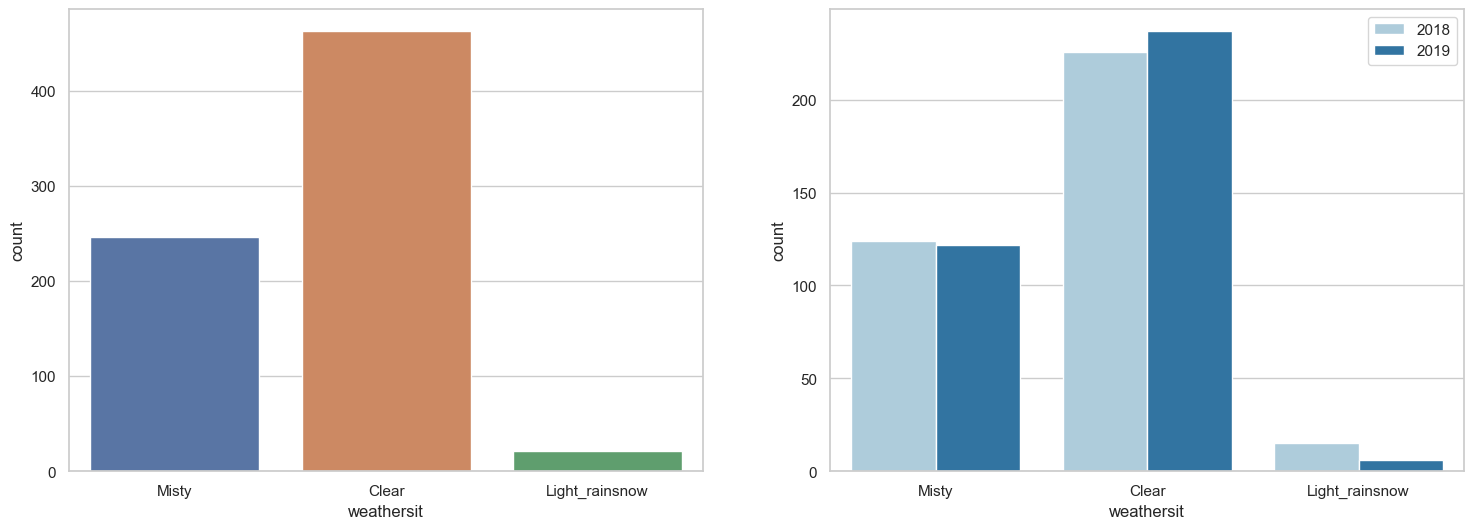

In [27]:
cat_plots('weathersit', 18,6, bike)

### Observation

* During clear weather,68.6% of the booking happened . Whereas only 30.24% of booking happened in Misty weather. Very few bookings happened during Light rain and snow due to obvious reasons

* ### Analyzing Weekday

In [28]:
cat_stats('weekday')

,sum,mean,count,sum_perc,count_perc
weekday,,,,,
Friday,487790,4690.29,104,14.82,14.25
Thursday,485395,4667.26,104,14.75,14.25
Saturday,477807,4550.54,105,14.52,14.38
Wednesday,471214,4574.89,103,14.32,14.11
Tuesday,469109,4510.66,104,14.25,14.25
Monday,455503,4338.12,105,13.84,14.38
Sunday,444027,4228.83,105,13.49,14.38


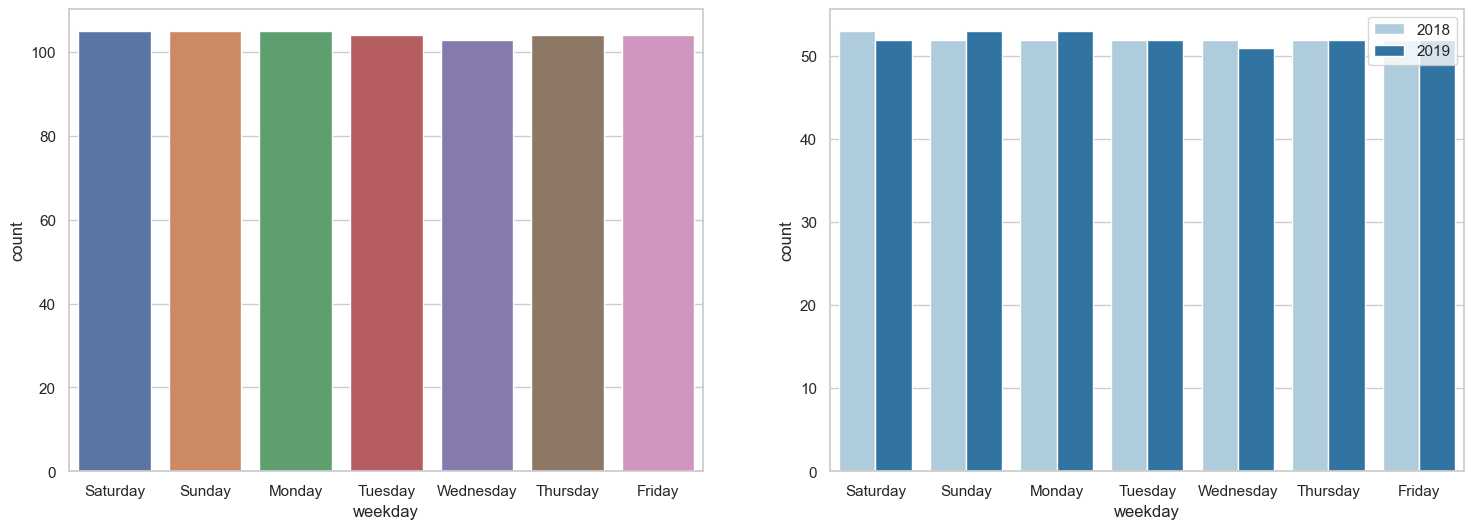

In [29]:
cat_plots('weekday',18,6, bike)

### Observation 

* Bookings done on a weekday are almost evenly distributed i.e around 14%

* ### Analyzing Workingday

In [30]:
cat_stats('workingday')

,sum,mean,count,sum_perc,count_perc
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


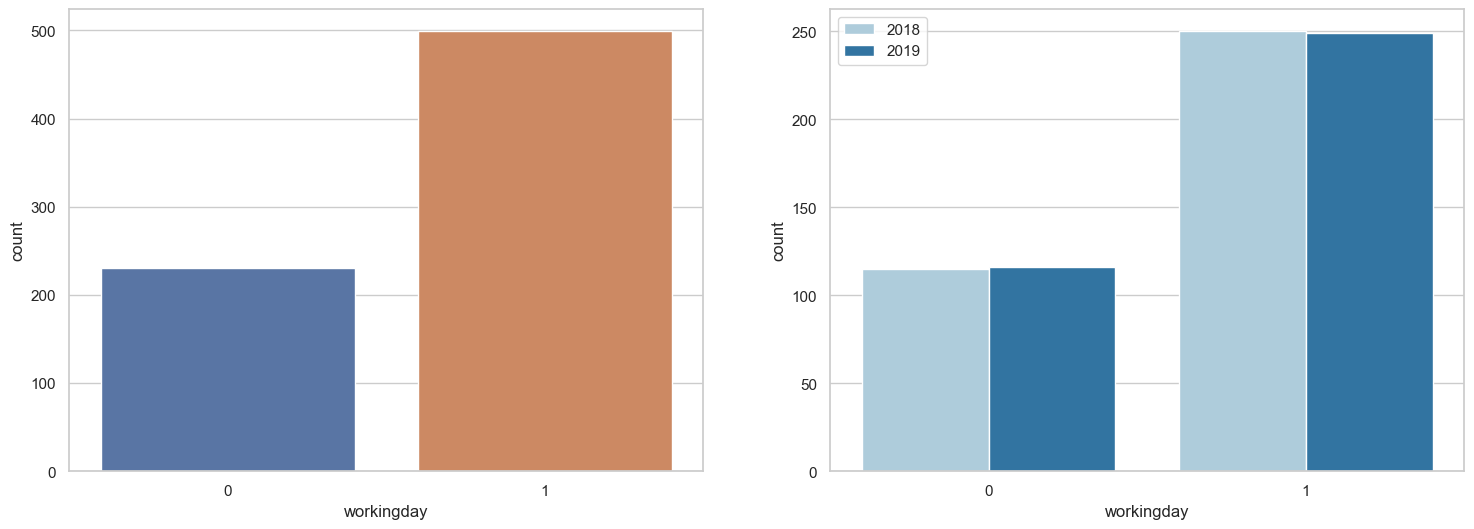

In [31]:
cat_plots('workingday', 18,6, bike)

### Observation
        
* Almost 69% of the bike booking happened on a working day.


* ### Analyzing Holiday

In [32]:
cat_stats('holiday')

,sum,mean,count,sum_perc,count_perc
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


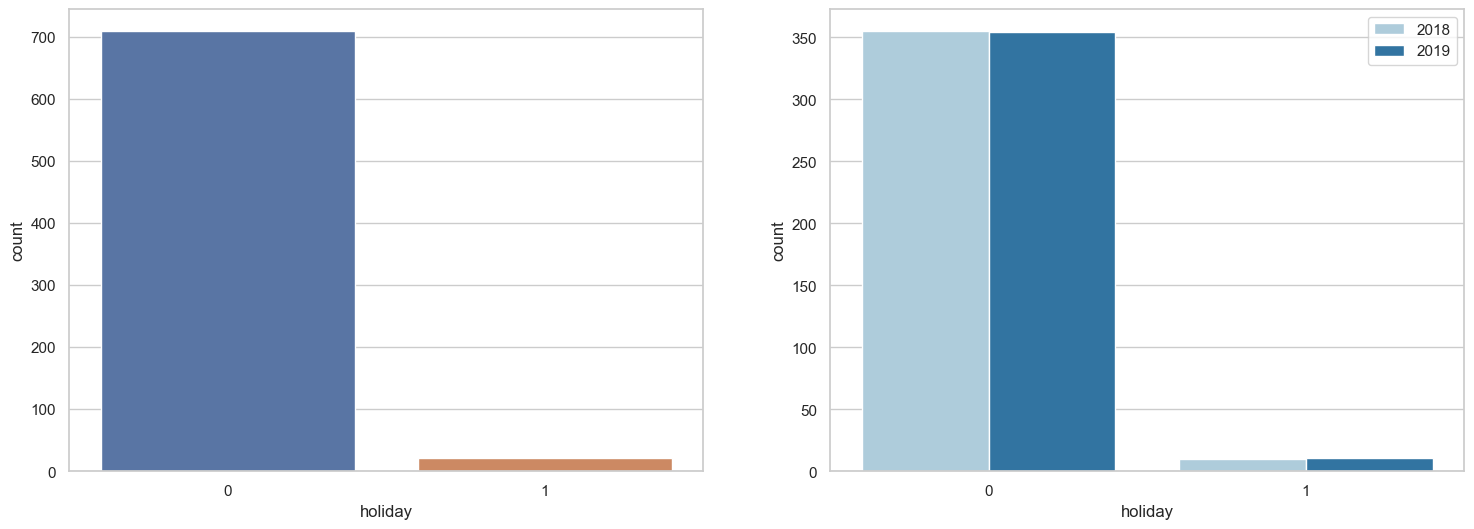

In [33]:
cat_plots('holiday', 18,6, bike)

### Observation

* Around 97% of bike rentals took place during non-holiday time.


* ### Analyzing Year

In [34]:
cat_stats('year')

,sum,mean,count,sum_perc,count_perc
year,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


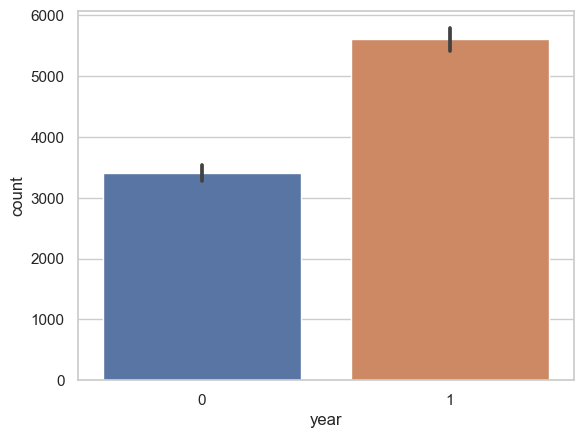

In [35]:
sns.barplot(x='year', y='count', data=bike)

plt.show()

 ### Observation
 
 * There has been a significant growth in demand during 2019 comapred to 2018

# Numerical Variable Analysis
 

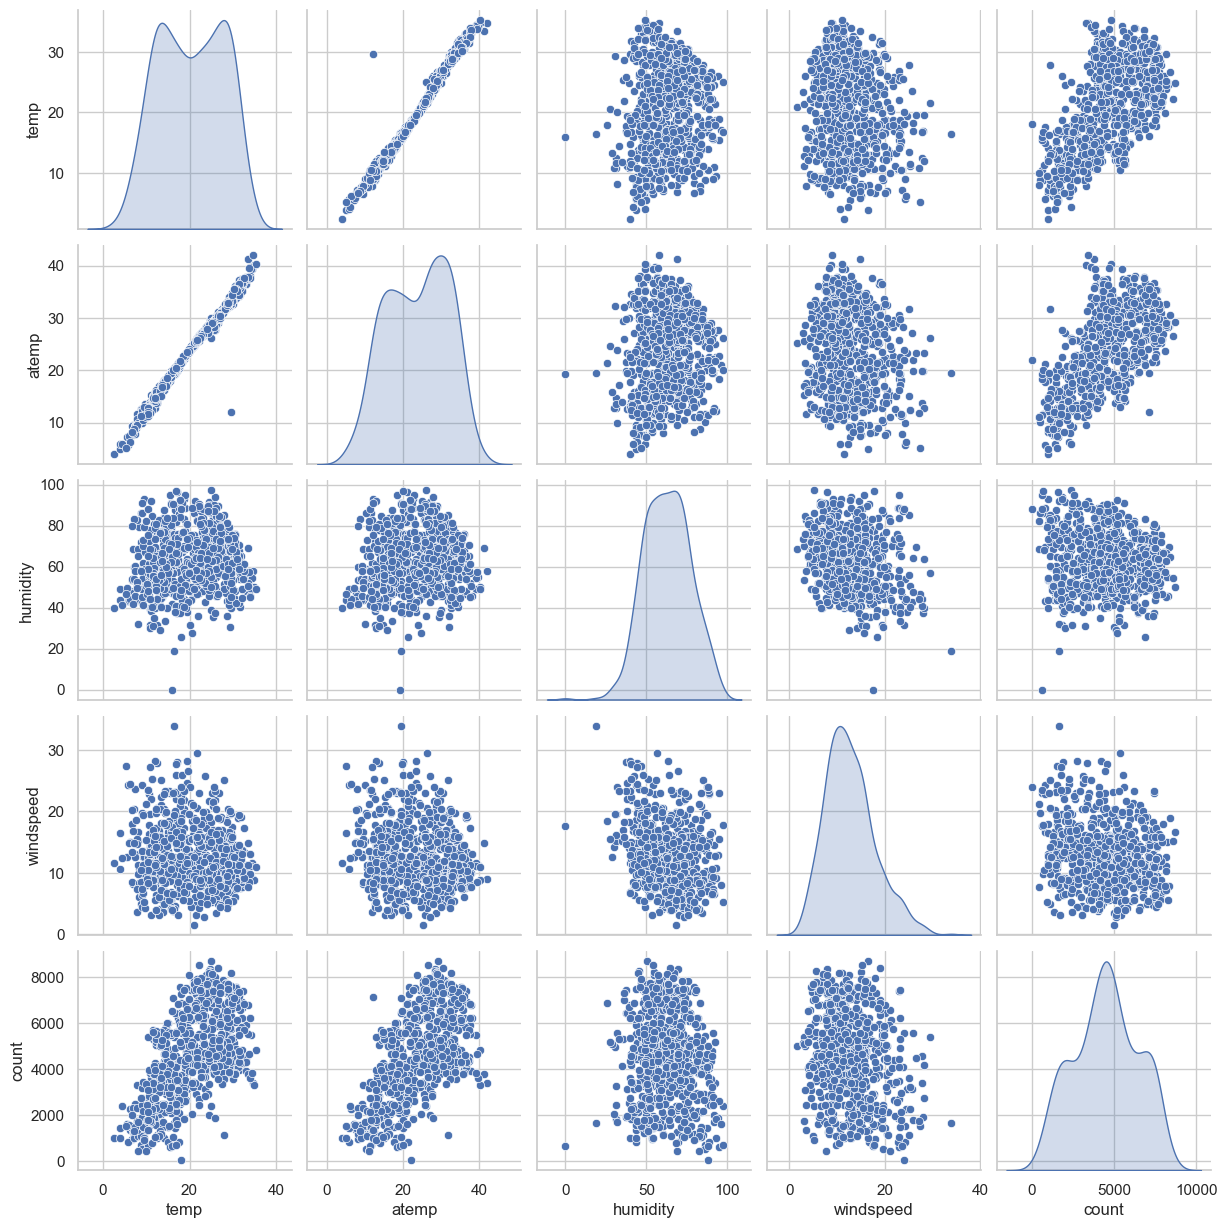

In [36]:
bike_num = bike[['temp','atemp','humidity','windspeed','count']]
sns.pairplot(bike_num,diag_kind='kde')
plt.show()

### Observation 

* It seems there is a Linear relation between 'temp','atemp' and 'cnt' , we can see both variables has close values

<Axes: >

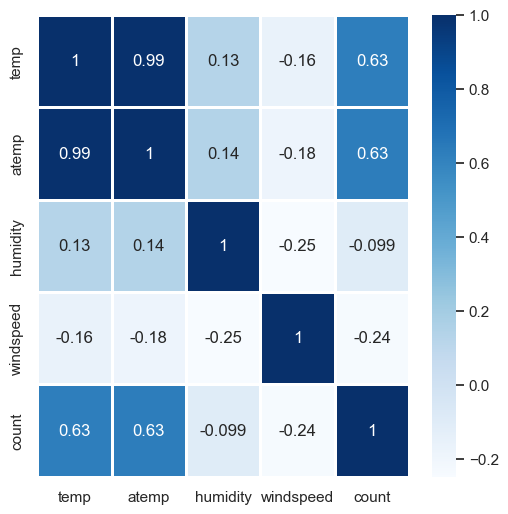

In [37]:
plt.figure(figsize = (6,6))
sns.heatmap(bike_num.corr(), cmap='Blues', annot=True, linewidth=1)

<Figure size 4000x600 with 0 Axes>

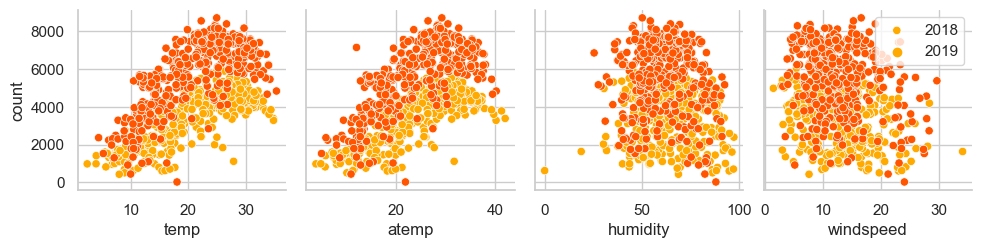

In [38]:
# Checking the impact of year against the numerical variable : 
plt.figure(figsize = (40,6))
ax = sns.pairplot(x_vars=['temp', 'atemp', 'humidity', 'windspeed'], y_vars=['count'] , data=bike, hue='year', palette='autumn_r')
ax._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

# Preparation of Data

## Creating Dummy variables


In [39]:
# Dummy Variable
months=pd.get_dummies(bike.months,drop_first=True)
weekdays=pd.get_dummies(bike.weekday,drop_first=True)
weather_sit=pd.get_dummies(bike.weathersit,drop_first=True)
seasons=pd.get_dummies(bike.season,drop_first=True)

In [40]:
### Merging the dataframe

bike=pd.concat([months,weekdays,weather_sit,seasons,bike],axis=1)
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,season,year,months,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Saturday,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,Spring,0,Jan,0,Sunday,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,Spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,Spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,Spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [41]:
### Dropping the unwanted columns

bike.drop(['months', 'weekday', 'weathersit', 'season'], axis = 1, inplace = True)

In [42]:
bike.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [43]:
bike.shape

(730, 30)

In [44]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Aug             730 non-null    uint8  
 1   Dec             730 non-null    uint8  
 2   Feb             730 non-null    uint8  
 3   Jan             730 non-null    uint8  
 4   Jul             730 non-null    uint8  
 5   Jun             730 non-null    uint8  
 6   Mar             730 non-null    uint8  
 7   May             730 non-null    uint8  
 8   Nov             730 non-null    uint8  
 9   Oct             730 non-null    uint8  
 10  Sep             730 non-null    uint8  
 11  Monday          730 non-null    uint8  
 12  Saturday        730 non-null    uint8  
 13  Sunday          730 non-null    uint8  
 14  Thursday        730 non-null    uint8  
 15  Tuesday         730 non-null    uint8  
 16  Wednesday       730 non-null    uint8  
 17  Light_rainsnow  730 non-null    uin

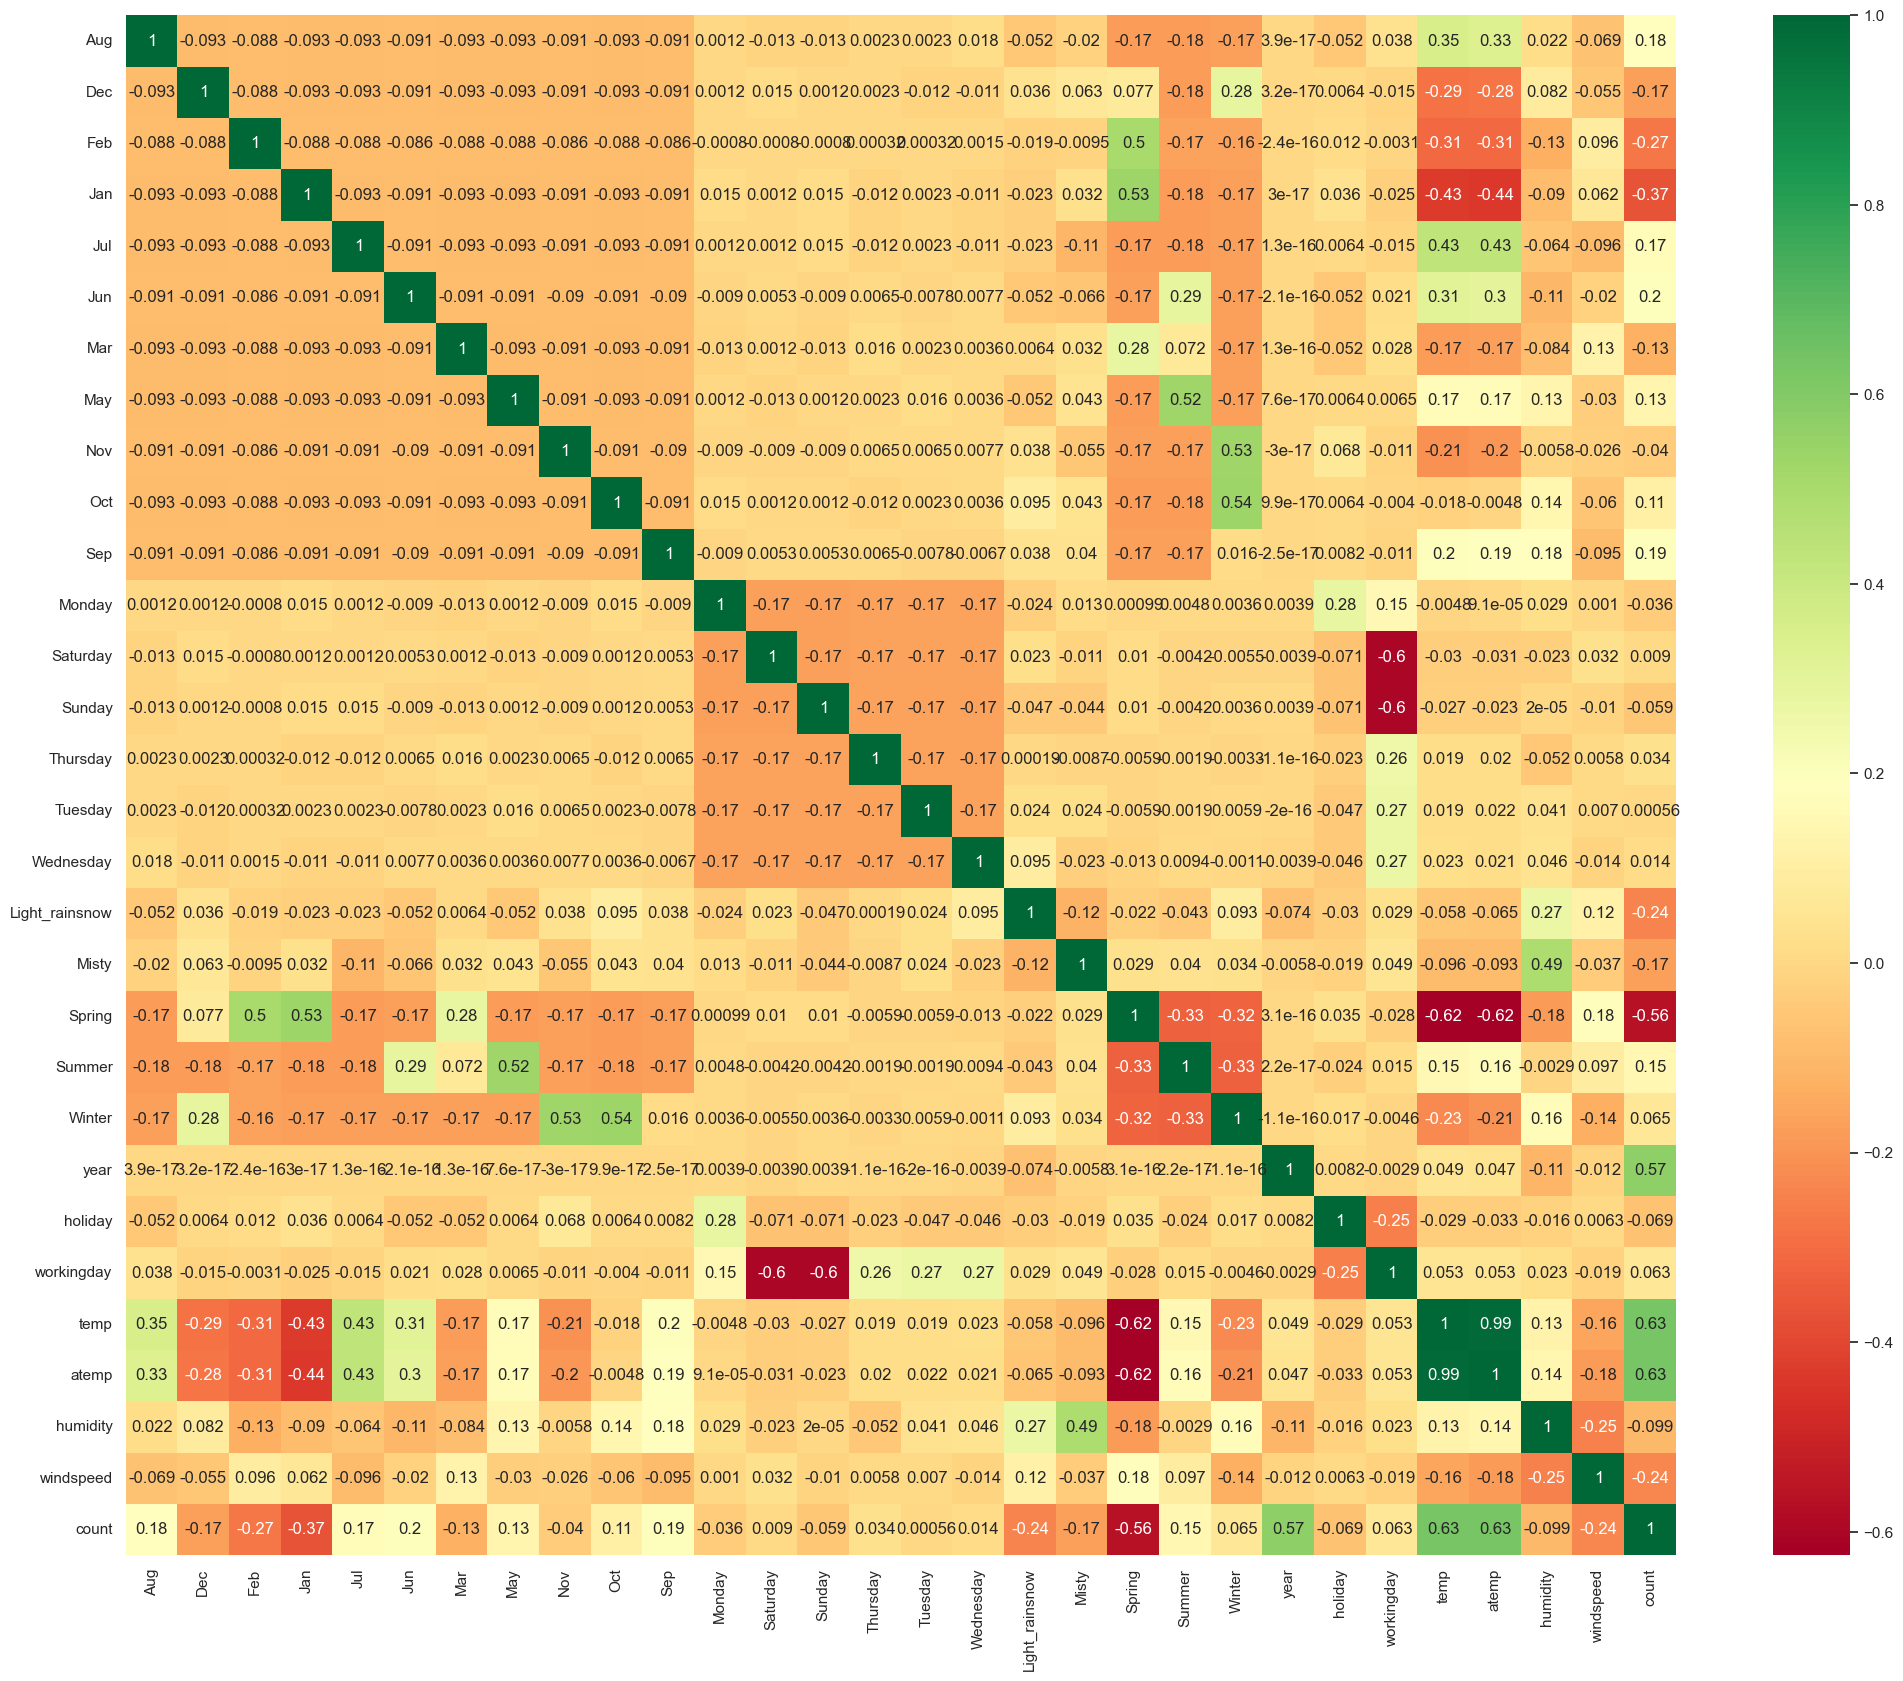

In [45]:
plt.figure(figsize=(25, 20))
sns.heatmap(bike.corr(), cmap='RdYlGn', annot = True)
plt.show()

### Observations

<ul>
    <li> We can observe multi-colinearity between the variables. </li>
    <li> We will use either temp or atemp as there is high multicolinearity amongst the two.</li>
    <li> temp, atemp and year has a strong correlation with count. </li>
    <li> Spring is negatively correlated with count. </li>
    <li> Misty weather and humidity are correlated.</li>
    <li> Months and corresponding weathers are co-related as expecetd</li>            
</ul>    


# Splitting the data into Train and Test Data set

In [46]:
from sklearn.model_selection import train_test_split
bike_train, bike_test = train_test_split(bike,train_size = 0.7, random_state=100)

In [47]:
bike_train.shape

(510, 30)

In [48]:
bike_train.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098,0.243137,0.247059,0.247059,0.507843,0.025490,0.676471,20.108257,23.500287,63.123710,12.834912,4485.337255
std,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867,0.429398,0.431725,0.431725,0.500429,0.157763,0.468282,7.431626,8.090963,14.153170,5.292031,1950.666077
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,2.834381,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.606865,16.603063,52.270825,9.041918,3120.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,20.277923,24.131150,63.437500,12.083182,4530.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,26.615847,30.177700,73.250025,15.750879,5973.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,34.000021,8714.000000


In [49]:
print(bike_train.shape)
print(bike_test.shape)

(510, 30)
(220, 30)


## Rescaling the bike_train dataframe

* We will be using MinMaxScaler for scaling the dataframe

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [51]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,29.246653,33.1448,70.4167,11.083475,7216
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,16.980847,20.6746,62.1250,10.792293,4066
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,10.489153,11.5850,48.3333,23.500518,1796
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,15.443347,18.8752,48.9583,8.708325,4220
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,13.803347,16.0977,72.9583,14.707907,1683


In [52]:
# Appliyng scaler on numerical vars
num_vars = ['temp','humidity','windspeed','count']
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])

In [53]:
bike_train[num_vars].head()

,temp,humidity,windspeed,count
576,0.815169,0.725633,0.264686,0.827658
426,0.442393,0.640189,0.255342,0.465255
728,0.245101,0.498067,0.663106,0.204096
482,0.395666,0.504508,0.188475,0.482973
111,0.345824,0.751824,0.380981,0.191095


In [54]:
bike_train.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,33.1448,0.725633,0.264686,0.827658
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,20.6746,0.640189,0.255342,0.465255
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,11.5850,0.498067,0.663106,0.204096
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,18.8752,0.504508,0.188475,0.482973
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,16.0977,0.751824,0.380981,0.191095


# Linear Model Building

In [55]:
# Building the model

y_train = bike_train.pop('count')
X_train = bike_train

In [56]:
X_train

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed
576,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0.815169,33.14480,0.725633,0.264686
426,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0.442393,20.67460,0.640189,0.255342
728,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0.245101,11.58500,0.498067,0.663106
482,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0.395666,18.87520,0.504508,0.188475
111,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0.345824,16.09770,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0.863973,35.35440,0.679690,0.187140
53,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0.202618,12.28585,0.435939,0.111379
350,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0.248216,12.46855,0.577930,0.431816
79,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0.462664,20.48675,0.759870,0.529881


## Recursive Feature Elimination: 

***We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE***

In [57]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Aug', False, 4),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 9),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 5),
 ('Sep', True, 1),
 ('Monday', True, 1),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 2),
 ('Wednesday', False, 8),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [60]:
#Columns where RFE support is True
col = X_train.columns[rfe.support_]
col

Index(['Dec', 'Feb', 'Jan', 'Jul', 'Nov', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Light_rainsnow', 'Misty', 'Spring', 'Summer', 'Winter',
       'year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

In [61]:
#Columns where RFE support is False
X_train.columns[~rfe.support_]

Index(['Aug', 'Jun', 'Mar', 'May', 'Oct', 'Thursday', 'Tuesday', 'Wednesday',
       'atemp'],
      dtype='object')

In [62]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Manual Model Development using statsmodel

In [63]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train_rfe = sm.add_constant(X_train_rfe)

In [64]:
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
calculateVIF(X_train_rfe)

,Features,VIF
8,Saturday,inf
17,workingday,inf
9,Sunday,inf
16,holiday,inf
12,Spring,5.70
18,temp,4.75
14,Winter,3.85
13,Summer,2.82
3,Jan,2.37
19,humidity,1.94


# MODEL 1

In [66]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          6.46e-189
Time:                        15:00:50   Log-Likelihood:                 525.17
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2419      0.030      8.

# MODEL 2

In [67]:
# M2
X_train_new = X_train_rfe.drop(['Sunday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,93.26
11,Spring,5.70
17,temp,4.75
13,Winter,3.85
12,Summer,2.82
3,Jan,2.37
16,workingday,1.96
18,humidity,1.94
2,Feb,1.86
5,Nov,1.82


In [68]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          6.46e-189
Time:                        15:00:50   Log-Likelihood:                 525.17
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     490   BIC:                            -925.6
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2870      0.038      7.

# MODEL 3

In [69]:
# M3
X_train_new = X_train_lm1.drop(['Saturday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,88.02
10,Spring,5.70
16,temp,4.75
12,Winter,3.85
11,Summer,2.82
3,Jan,2.37
17,humidity,1.93
2,Feb,1.86
5,Nov,1.82
1,Dec,1.66


In [70]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     151.2
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          5.08e-187
Time:                        15:00:50   Log-Likelihood:                 517.95
No. Observations:                 510   AIC:                            -997.9
Df Residuals:                     491   BIC:                            -917.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3205      0.037      8.

# MODEL 4

In [71]:
# M4
X_train_new = X_train_lm1.drop(['workingday'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,85.91
10,Spring,5.70
15,temp,4.74
12,Winter,3.84
11,Summer,2.82
3,Jan,2.37
16,humidity,1.93
2,Feb,1.86
5,Nov,1.82
1,Dec,1.66


In [72]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     158.8
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.26e-187
Time:                        15:00:50   Log-Likelihood:                 515.75
No. Observations:                 510   AIC:                            -995.5
Df Residuals:                     492   BIC:                            -919.3
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3323      0.037      9.

# MODEL 5

In [73]:
# M5
X_train_new = X_train_lm1.drop(['Feb'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,82.71
9,Spring,5.28
14,temp,4.43
11,Winter,3.83
10,Summer,2.77
15,humidity,1.93
4,Nov,1.78
2,Jan,1.68
8,Misty,1.57
1,Dec,1.50


In [74]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          9.37e-188
Time:                        15:00:50   Log-Likelihood:                 514.36
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     493   BIC:                            -922.7
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3207      0.036      8.

# MODEL 6

In [75]:
# M6
X_train_new = X_train_lm1.drop(['Nov'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,78.76
8,Spring,5.10
13,temp,4.15
10,Winter,3.59
9,Summer,2.69
14,humidity,1.92
2,Jan,1.65
7,Misty,1.56
3,Jul,1.49
4,Sep,1.31


In [76]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.7
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          5.97e-188
Time:                        15:00:50   Log-Likelihood:                 512.12
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     494   BIC:                            -924.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3042      0.035      8.

# MODEL 7

In [77]:
# M7
X_train_new = X_train_lm1.drop(['Dec'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,76.87
7,Spring,5.09
12,temp,3.89
9,Winter,3.59
8,Summer,2.65
13,humidity,1.90
1,Jan,1.57
6,Misty,1.56
2,Jul,1.49
3,Sep,1.30


In [78]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.0
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          9.98e-189
Time:                        15:00:50   Log-Likelihood:                 511.23
No. Observations:                 510   AIC:                            -992.5
Df Residuals:                     495   BIC:                            -929.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2970      0.035      8.

# MODEL 8

In [79]:
# M8
X_train_new = X_train_lm1.drop(['Jan'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,74.50
6,Spring,5.02
11,temp,3.62
8,Winter,3.48
7,Summer,2.62
12,humidity,1.90
5,Misty,1.56
1,Jul,1.48
2,Sep,1.30
4,Light_rainsnow,1.24


In [80]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          3.97e-189
Time:                        15:00:50   Log-Likelihood:                 509.42
No. Observations:                 510   AIC:                            -990.8
Df Residuals:                     496   BIC:                            -931.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2855      0.035      8.

# MODEL 9

In [81]:
# M9
X_train_new = X_train_lm1.drop(['Spring'], axis = 1)
# Run the function to calculate VIF for the new model
calculateVIF(X_train_new)

,Features,VIF
0,const,45.00
11,humidity,1.87
10,temp,1.60
5,Misty,1.55
1,Jul,1.43
6,Summer,1.33
7,Winter,1.29
4,Light_rainsnow,1.24
2,Sep,1.19
12,windspeed,1.18


In [82]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.00e-188
Time:                        15:00:50   Log-Likelihood:                 505.66
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     497   BIC:                            -930.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2265      0.027      8.

# FINAL MODEL

In [83]:
# M10
X_train_lm1

# X_train_new = X_train_lm1.drop(['Tuesday'], axis = 1)
# # Run the function to calculate VIF for the new model
# calculateVIF(X_train_new) 
# X_train_lm1

,const,Jul,Sep,Monday,Light_rainsnow,Misty,Summer,Winter,year,holiday,temp,humidity,windspeed
576,1.0,1,0,0,0,0,0,0,1,0,0.815169,0.725633,0.264686
426,1.0,0,0,0,0,1,0,0,1,0,0.442393,0.640189,0.255342
728,1.0,0,0,0,0,0,0,0,1,0,0.245101,0.498067,0.663106
482,1.0,0,0,0,0,1,1,0,1,0,0.395666,0.504508,0.188475
111,1.0,0,0,0,0,1,1,0,0,0,0.345824,0.751824,0.380981
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0,0,0,0,0,0,0,1,0,0.863973,0.679690,0.187140
53,1.0,0,0,0,0,0,0,0,0,0,0.202618,0.435939,0.111379
350,1.0,0,0,0,0,1,0,1,0,0,0.248216,0.577930,0.431816
79,1.0,0,0,1,0,1,1,0,0,0,0.462664,0.759870,0.529881


In [84]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_new)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          1.00e-188
Time:                        15:00:51   Log-Likelihood:                 505.66
No. Observations:                 510   AIC:                            -985.3
Df Residuals:                     497   BIC:                            -930.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2265      0.027      8.

## Observations 
* There seems to be very low Multicollinearity between the predictors and the p-values for all the predictors seems to be significant.The model looks good to me,hence considering this is as the final model (unless the test data metrics are not significantly close to this number).


In [85]:
# Checking the parameters obtained
lr1.params

const             0.226510
Jul              -0.047709
Sep               0.096117
Monday           -0.004764
Light_rainsnow   -0.231940
Misty            -0.050226
Summer            0.081649
Winter            0.134785
year              0.228174
holiday          -0.095871
temp              0.597498
humidity         -0.183596
windspeed        -0.189518
dtype: float64

# Final Model Interpretation

<h2> 
    <font color = black>
        <span style='font-family:Candra'>
    Hypothesis Testing 
                 </font>
</h2>



<p> Hypothesis Testing States that<br>
    <blockquote>
        H0:B1=B2=...=Bn=0 <br>
        H1: at least one  Bi!=0
    </blockquote><br>

In [86]:
lr1.params

const             0.226510
Jul              -0.047709
Sep               0.096117
Monday           -0.004764
Light_rainsnow   -0.231940
Misty            -0.050226
Summer            0.081649
Winter            0.134785
year              0.228174
holiday          -0.095871
temp              0.597498
humidity         -0.183596
windspeed        -0.189518
dtype: float64

From the lr1 model summary, it is evident that all our coefficients are not equal to zero, which means we can **REJECT the NULL HYPOTHESIS**


<h2> 
    <span style='font-family:Candra'>
    <font color = black>
    F-Staitsics
        </font>
        </span>
    
</h2>
    <p> F-Statistics is used for testing the overall significance of the Model. The higher the F-Statistics, the more significant the Model is.</p>
    <blockquote>
        F-Statistics :       237.0 <br>
        Prob (F-statistic):  6.89e-190
    </blockquote>   
    


<span>
    <b>Observation:</b> The F-Statistics value of 237 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant
</span>    
</div>


<h1>
    <span>
        <font color = black>
    Best fitted model equation
        </font>
            </span> 
        </h1>




<p style="font-size:20px">
    <span style='font-family:Candra'>
count=0.226223 - (0.047814 x Jul) + (0.096174 x Sep) - (0.231830 x Light_rainsnow) − (0.050192 x Misty) + (0.081529 x Summer) + (0.134695 x Winter) + (0.227954 x year) - (0.098909 x holiday) + (0.597749 x temp) − (0.184135 x humidity) - (0.189481 x windspeed)

</span>
    </p>
</div>


### Interpretation of the co-efficients

<p>  </p>
    
<ul>
<li><b>const</b> : The Constant value of ‘0.226223’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike rental can still increase by 0.226223 units </li><hr>

 <li><b>Jul</b> : A coefficient value of ‘-0.047814’ indicated that a unit increase in Jul variable, decrease the bike hire numbers by 0.047814 units </li><hr> 

 <li><b>Sep</b> : A coefficient value of ‘0.096174’ indicated that, a unit increase in Sep variable increases the bike hire numbers by 0.096174 units </li><hr> 

 <li><b>Light_rainsnow</b> : A coefficient value of ‘-0.231830’ indicated that a unit increase in Light_rainsnow variable, decreases the bike hire numbers by 0.231830 units </li><hr> 

 <li><b>Misty</b> : A coefficient value of ‘-0.050192’ indicated that, a unit increase in Misty variable decreases the bike hire numbers by 0.050192 units </li><hr> 

 <li><b>Summer</b> : A coefficient value of ‘0.081529’ indicated that a unit increase in Summer variable increase the bike hire numbers by 0.081529 units </li><hr> 

 <li><b>Winter</b> : A coefficient value of ‘0.134695’ indicated that a unit increase in Winter variable increases the bike hire numbers by 0.134695 units</li><hr> 

 <li><b>year</b> : A coefficient value of ‘0.227954’ indicated that a unit increase in year variable increases the bike hire numbers by 0.227954 units </li><hr> 

 <li><b>holiday</b> : A coefficient value of ‘-0.098909’ indicated that, a unit increase in holiday variable, decreases the bike hire numbers by 0.098909 units </li><hr> 

 <li><b>temp</b> : A coefficient value of ‘0.597749’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.597749 units </li><hr> 

 <li><b>humidity</b> : A coefficient value of ‘-0.184135’ indicated that a unit increase in humidity variable decreases the bike hire numbers by 0.184135 units </li><hr> 

<li><b>windspeed</b> : A coefficient value of ‘-0.189481’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.189481 units </li><hr>
</ul>
</span>

# Model Validation


<span>
     Validating the assumption of Linear Regression Model : 
        <ul>
            <li> Linear Relationship </li>
            <li> Homoscedasticity </li>
            <li> Absence of Multicollinearity </li>
            <li> Independence of residuals </li>
            <li> Normality of Errors</li>
        </ul>
    
</span>

# Analyzing Linear relationship

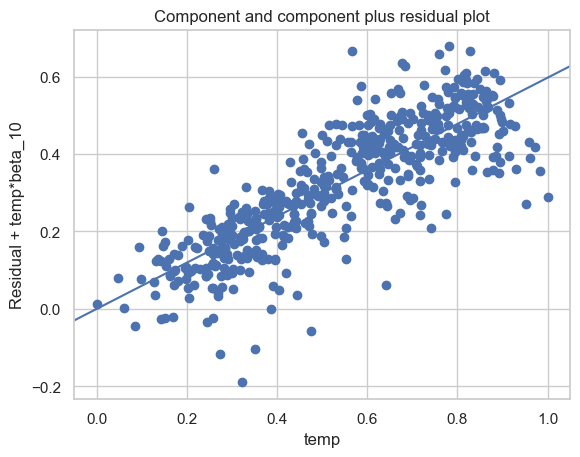

In [87]:
sm.graphics.plot_ccpr(lr1, 'temp')
plt.show()

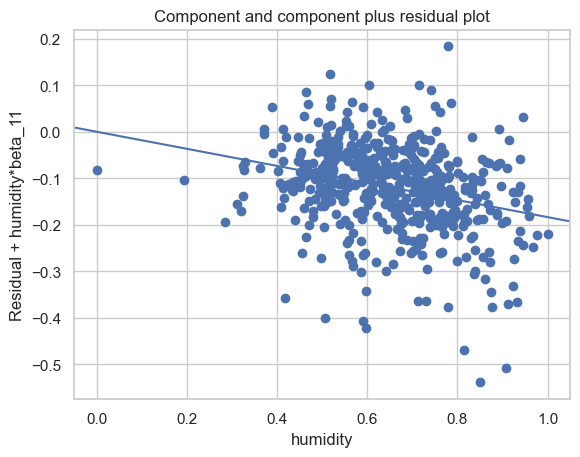

In [88]:
sm.graphics.plot_ccpr(lr1, 'humidity')
plt.show()

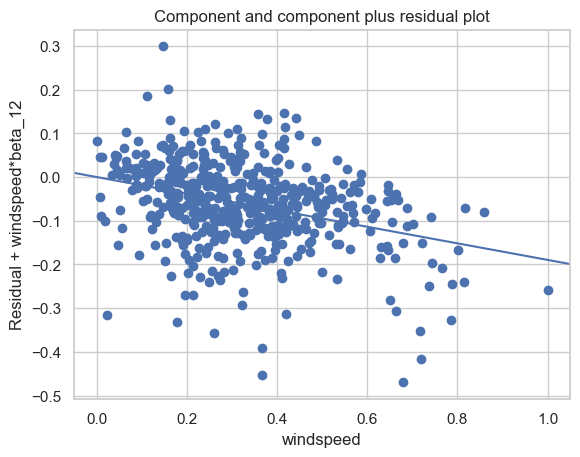

In [89]:
sm.graphics.plot_ccpr(lr1, 'windspeed')
plt.show()

## Observations

* The above plots depict the relationship between the model and the different predictor variables. We can clearly see that the  linearity is well preserved

# Homoscedasticity

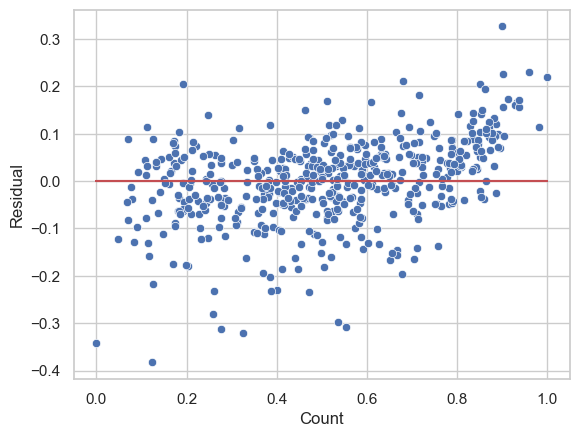

In [90]:
y_train_pred = lr1.predict(X_train_lm1)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train, y=residual)
plt.plot(y_train, (y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()


### Observation

* No such visible pattern observed in residual values, thus we can conclude homoscedacity is well preserved

# Multicolinearity

In [91]:
X_train_new.columns

Index(['const', 'Jul', 'Sep', 'Monday', 'Light_rainsnow', 'Misty', 'Summer',
       'Winter', 'year', 'holiday', 'temp', 'humidity', 'windspeed'],
      dtype='object')

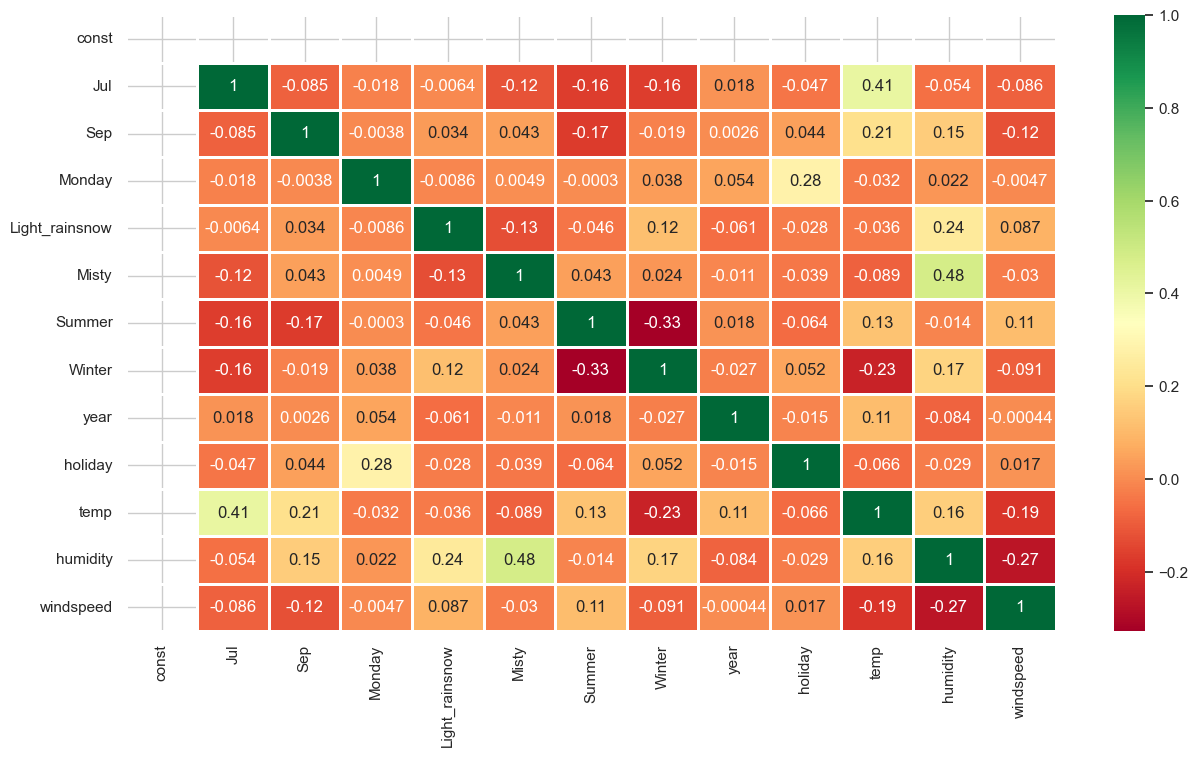

In [92]:
# Validating Multi Colinearity
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

In [93]:
# Run the function to calculate VIF for the final model
calculateVIF(X_train_new)

,Features,VIF
0,const,45.00
11,humidity,1.87
10,temp,1.60
5,Misty,1.55
1,Jul,1.43
6,Summer,1.33
7,Winter,1.29
4,Light_rainsnow,1.24
2,Sep,1.19
12,windspeed,1.18



## Observation

* Since the VIF value is less than 5 for all the predictor varibales we can conclude that the multicolinearity is quite insignificant.

#  Normality of Error



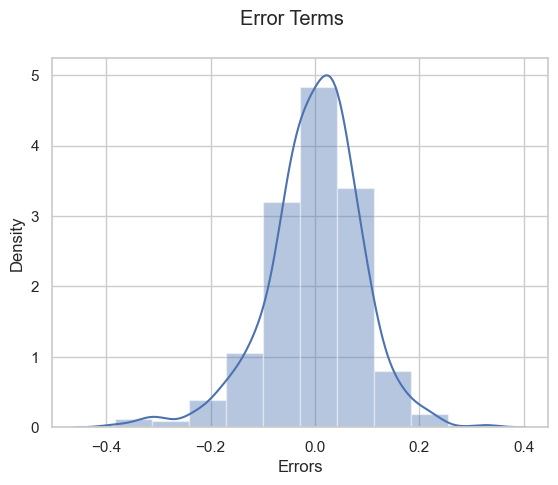

In [94]:
res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 10)
fig.suptitle('Error Terms')                  
plt.xlabel('Errors')                         
plt.show()


## Observation

* Based on the above plot we can conclude that the error is normally distributed

<h1>
    <font color = Black>
        <span>
        Predictions based on final model
        </span>    
    </font>
</h1>

<h2>   
      <font color = black >
          <span>
            Scaling the bike_test dataframe 
              </span> 
        </font>    
</h2>
<p>Applying scaler.transform() to all numeric variables in test dataset.
</p>
 

In [95]:
num_vars = ['temp', 'humidity', 'windspeed','count']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])
bike_test[num_vars].head()

,temp,humidity,windspeed,count
184,0.831783,0.657364,0.084219,0.692706
535,0.901354,0.610133,0.153728,0.712034
299,0.511964,0.837699,0.334206,0.303382
221,0.881625,0.437098,0.339570,0.547400
152,0.817246,0.314298,0.537414,0.569029


In [96]:
bike_test.describe()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty,Spring,Summer,Winter,year,holiday,workingday,temp,atemp,humidity,windspeed,count
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364,0.481818,0.036364,0.700000,0.558718,24.250312,0.638221,0.313293,0.522154
std,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817,0.500809,0.187620,0.459303,0.233187,8.281075,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,4.941955,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,17.090025,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,24.700000,0.625590,0.300126,0.524678
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.755981,31.124313,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,41.318550,1.002146,0.807474,0.963300


In [97]:
y_test = bike_test['count']
X_test = bike_test

In [103]:
col1=X_train_lm1.columns
# Drop 'const' from col1 if it exists
col1 = col1.drop('const', errors='ignore')
X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm1 = sm.add_constant(X_test)

X_test_lm1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   Jul             220 non-null    uint8  
 2   Sep             220 non-null    uint8  
 3   Monday          220 non-null    uint8  
 4   Light_rainsnow  220 non-null    uint8  
 5   Misty           220 non-null    uint8  
 6   Summer          220 non-null    uint8  
 7   Winter          220 non-null    uint8  
 8   year            220 non-null    int64  
 9   holiday         220 non-null    int64  
 10  temp            220 non-null    float64
 11  humidity        220 non-null    float64
 12  windspeed       220 non-null    float64
dtypes: float64(4), int64(2), uint8(7)
memory usage: 13.5 KB


In [104]:
y_pred = lr1.predict(X_test_lm1)

# Model Evaluation

Text(0, 0.5, 'y_pred')

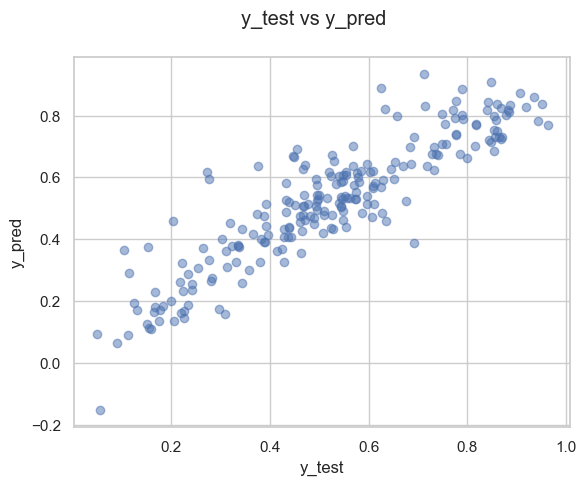

In [105]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')


<h2>   
      <font color = black >
          <span style='font-family:Candra'>
          R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h2>
</span>

In [106]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y_test, y_pred),4)
r2

0.8056


<h2>   
<span>
    <font color = Black >
          Adjusted R<sup>2</sup> Value Calculation for bike_test dataframe           
        </font>    
</h2>
<br>

</span>
<span style="font-size:18" >
    <span style>
        <font color = black > 
      <math> R<sup>2</sup><sub>adj</sub>=1−</math>
        <span style="display: inline-block;vertical-align: middle;">
    <div style="text-align: center;border-bottom: 1px solid black;">(1-R<sup>2</sup>) x (n-1)</div>
     <div style="text-align: center;">(n-p-1)</div> 
        </span>
        </font>
</span>
</span>

In [107]:

# n is number of rows in test dataset
n = X_test.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
adjusted_r2 = round(1-(1-r2)*(n-1)/(n-p-1),4)
adjusted_r2

0.7943

<span style='font-family:Candra'>
<h3>  <span style='font-family:Candra'> 
      <font color = black >
            Model Train & Test R2 Statsitics Comparison           
        </font>    
</h3>
<table>
    <thead>
    <tr><th>Measurement</th><th>Train Dataset</th><th>Test Dataset</th></tr>
    </thead>
    <tbody>
        <tr><td>R2 Value</td><td>84.0%</td><td>83.6%</td></tr>
        <tr><td>Adjusted R2 Value</td><td>80.5%</td><td>79.4%</td></tr>
    </tbody>
</table>
    <p> The model seems to be good enough for generalized datasets </p>
</span>

# Calculating RMSE for the selected Model 

In [108]:
from math import sqrt
from sklearn.metrics import mean_squared_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0964

# Calculating MAE for the selected Model  

In [109]:
from sklearn.metrics import mean_absolute_error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0716

# Final Analysis


<span>
<p><b>Based on the model, the variables which are influencing the bike bookings are: </b></p>
        <br>
<li><b>Temperature (Temp)</b><br> It is evident from the model that customers prefer warm and pleasant temperature for bike booking </li>
<br>
<li><b>Year</b><br> There was significant rise in bike booking in 2019 compared to 2018. It is expected that during post-Covid people will avail this service rather travelling in crowded buses and trains </li>
<br>
<li><b> Season </b><br>It seems that customers prefered Summer and Fall season, hence, a good number of bikes should be available during this time.</li>
<br>
<li><b> Weather </b><br>It seems that customers avoided renting bikes during light snow and rain and preferred clear and cloudy weather</li>

        

    


# Recommendations to increase sales
    
    
    

<br>


<li><b>Frequent Sanitisation of Bikes</b>
    <br>
    Frequent Sanitisation of the Bikes and indicating the same in the booking app will help in building the trust between the customer and company
    </li>
    <br>

<li><b>Providing discounts and better deals</b><br>During rainy seasons, BoomBike should offer deals and discounts to attaract more customers.</li>
<br>

<li><b> Rain Covers or Umbrellas </b><br>Attached umbrellas or rain protective gears with bikes may attract more customers during rainy season</li><br>




